In [241]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import cv2
import os

orignal =[]


In [242]:
#Read all test videos
test=[]
f= 'sample_images_RA'
Test_videos =[]
test_list = open('Labels/test.txt','r')
for line in test_list:
    name = line.split(" ")[0]
    x=line.split(" ")[-1]
    test.append(x[0])
    Test_videos.append(f+"/"+name)
    

In [243]:
for i in test:
    if i=='0':
        orignal.append('normal')
    else:
        orignal.append('abnormal')

In [244]:
#To load pre-trained model, trained on 5 classes 
#model = tf.keras.models.load_model('Trained Models/model_Q3D.h5',compile=False)
#model.summary()

#To load pre-trained weeights,
model = tf.keras.models.load_model('Trained Models/weights_model_Q3D.hdf5',compile=False)

In [245]:
#two classes labesl
labels0 ={0:'normal', 1:'abnormal'}
prediction = []

In [246]:
def add_gaussian_noise(image, mean=5, sigma=5):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian_noise)
    return noisy_image

In [247]:
#Code for Confusion Matrix
for video in Test_videos:
    vid = []
    nor=0
    abnor=0
    path=video
    images = os.listdir(video)
    for img in images:
        img_path=path +"/"+img
        img2 = cv2.imread(img_path)
        img2 = add_gaussian_noise(img2, mean=5, sigma=5)
        img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        vid.append(cv2.resize(img2, (112, 112)))
    vid = np.array(vid, dtype=np.float32)
    length =len(vid)
    for i in range(0,len(vid),32):
        if abnor==3:
            break
        if i+32<=length:
            X = vid[i:i+32].transpose((1,2,0,3))
            output = model.predict_on_batch(np.array([X]))
            if(len(output)>0):
                str1=labels0[np.argmax(output)]
                if str1=='abnormal':
                    abnor=abnor+1
                else:
                    abnor=0
    
    vid=[]
    if abnor==3:
        prediction.append('abnormal')
    else:
        prediction.append('normal')

In [248]:
len(prediction)

16

<AxesSubplot:>

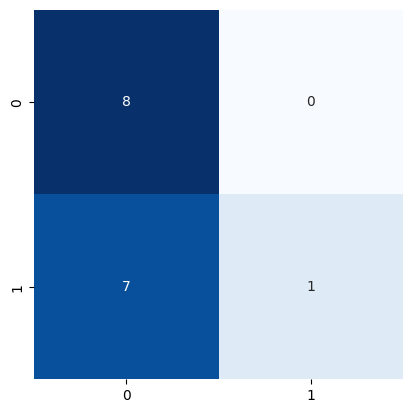

In [249]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(orignal, prediction)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)